In [1]:
import yfinance as yf
import datetime
import matplotlib.pyplot as
import panas as pd

# specify the start of the stock
start = datetime.datetime(2012, 1, 1)
#specify the end date upto where we need to do anlaysis
end = datetime.datetime(2023, 6, 29)

#retriveing the dataset
coke = yf.download('KO', start=start, end=end)
pepsi = yf.download('PEP', start=start, end=end)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
# storing dataset into csv file
coke.to_csv('coke.csv')
pepsi.to_csv('pepsi.csv')


In [3]:
coke.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,35.075001,35.355000,35.049999,35.070000,24.525681,15639600
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.371832,14239200
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.256435,14287600
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.102577,13646600
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.102577,10522600


In [4]:
pepsi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,66.860001,67.190002,66.360001,66.400002,47.634380,5348800
2012-01-04,66.410004,66.839996,66.120003,66.739998,47.878269,6042400
2012-01-05,66.580002,66.669998,66.120003,66.220001,47.505245,4909100
2012-01-06,66.269997,66.269997,65.290001,65.389999,46.909813,6533000
2012-01-09,65.260002,65.830002,65.010002,65.730003,47.153728,5859600


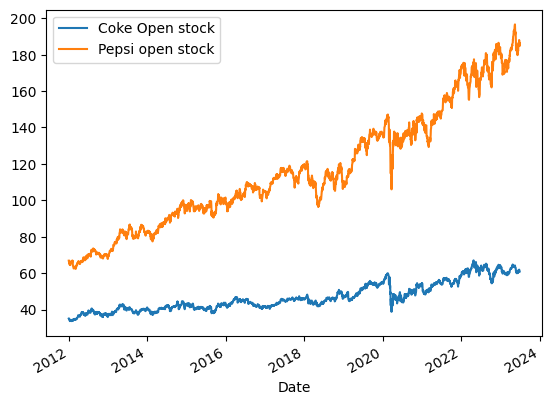

In [5]:
# analysis of opening stock of company
coke["Open"].plot(label = "Coke Open stock")
pepsi["Open"].plot(label = 'Pepsi open stock')
plt.legend()

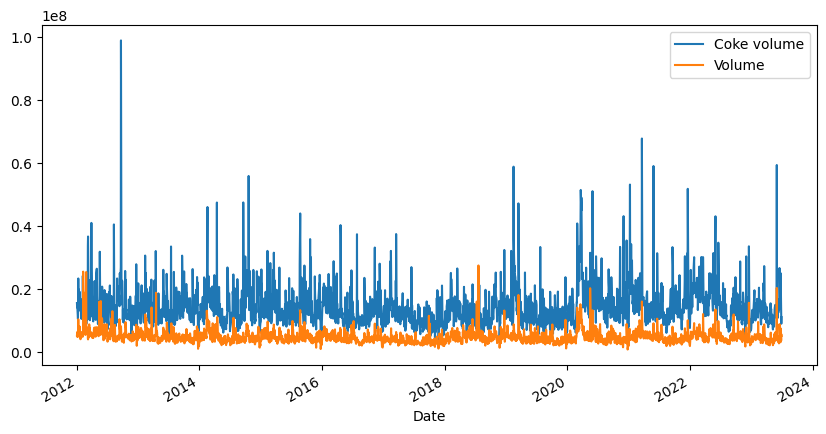

In [6]:
# analysis of volume of company
coke["Volume"].plot(label = "Coke volume", figsize = (10,5))
pepsi["Volume"].plot()
plt.legend()

In [7]:
# maximum volume of company at this date
coke.iloc[[coke["Volume"].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-21,38.73,38.740002,37.880001,38.029999,27.156763,98967500


In [8]:
coke["Volume"].argmax()

182

In [9]:
coke.iloc[175:185]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-09-12,37.790001,37.830002,37.509998,37.549999,26.813997,14632200
2012-09-13,37.730000,38.490002,37.610001,38.349998,27.385267,23803400
2012-09-14,38.549999,38.549999,38.009998,38.119999,27.221029,25087400
2012-09-17,38.160000,38.380001,38.029999,38.349998,27.385267,23594400
2012-09-18,38.380001,39.000000,38.299999,38.619999,27.578074,24373700
2012-09-19,38.660000,38.810001,38.410000,38.520000,27.506659,26276800
2012-09-20,38.389999,38.869999,38.380001,38.639999,27.592360,26953000
2012-09-21,38.730000,38.740002,37.880001,38.029999,27.156763,98967500
2012-09-24,37.810001,38.240002,37.810001,38.119999,27.221029,21902000


In [10]:
# creating column for maximum volume traded
coke["Traded"]  = coke["Open"] * coke["Volume"]
pepsi["Traded"] = pepsi["Open"] * pepsi["Volume"]

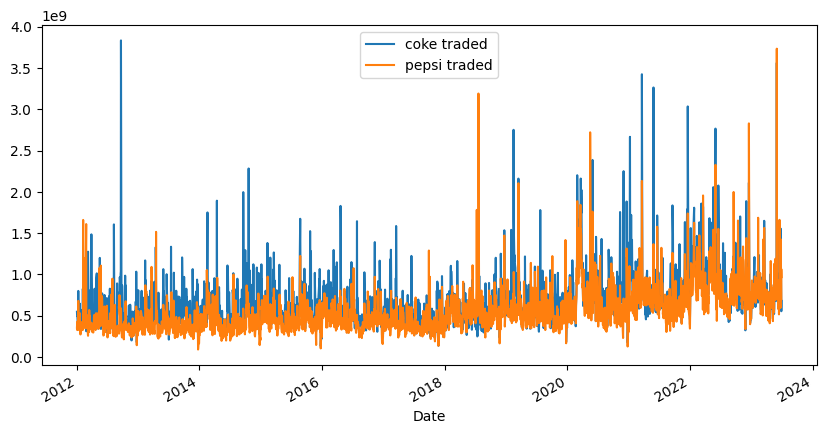

In [11]:
# analysis of traded volume
coke["Traded"].plot(label = "coke traded", figsize = (10,5))
pepsi["Traded"].plot(label = "pepsi traded")
plt.legend()

In [12]:
# maximum volume traded of pepsi at this date
pepsi.iloc[[pepsi["Traded"].argmax()]]

,Open,High,Low,Close,Adj Close,Volume,Traded
Date,,,,,,,
2023-05-31,182.860001,184.619995,181.460007,182.350006,181.085007,20414600,3.733014e+09


# Moving avarage
- It is techenique which is used to make our data much more reliable
and robust against noisy or scatterd data
- When moving avarage is too high we might miss out some of the trend in data
  but it can be reduced by using autoregression

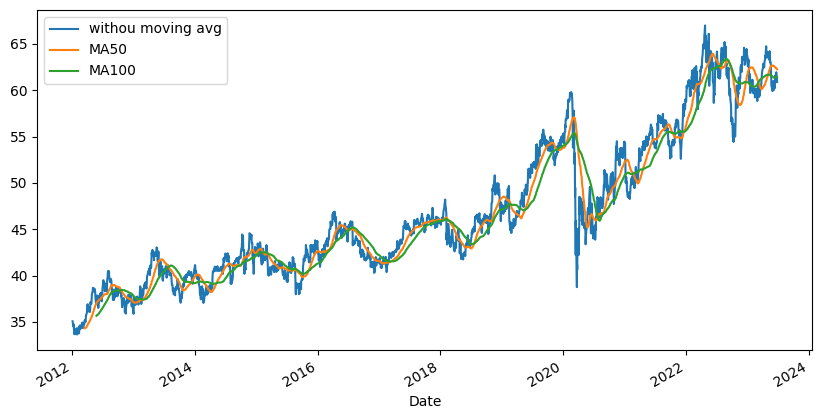

In [13]:
coke["Open"].plot(label = "withou moving avg", figsize = (10,5))
coke["MA50"] = coke["Open"].rolling(50).mean()
coke["MA50"].plot(label = "MA50")
coke["MA100"] = coke["Open"].rolling(100).mean()
coke["MA100"].plot(label = "MA100")
plt.legend()

# Correalation between opening stocks using scatter matrix


array([[<Axes: xlabel='Coke Open', ylabel='Coke Open'>,
        <Axes: xlabel='Pepsi Open', ylabel='Coke Open'>],
       [<Axes: xlabel='Coke Open', ylabel='Pepsi Open'>,
        <Axes: xlabel='Pepsi Open', ylabel='Pepsi Open'>]], dtype=object)

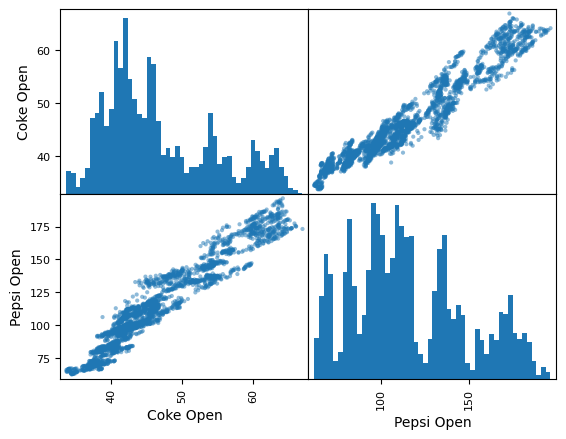

In [14]:
# finding relation between opening stocks of pepsi and coke
from pandas.plotting import scatter_matrix
import pandas as pd
drink_comp = pd.concat([coke["Open"],pepsi["Open"]], axis =1)
drink_comp.columns = ["Coke Open", "Pepsi Open"]
scatter_matrix(drink_comp, hist_kwds = {'bins':50})

# Daily percenatage change
r

In [15]:
# daily return of coke and coke and pepsi
# (-ve) means loss (+ve) means profit
coke["return"] = (coke["Close"]/coke["Close"].shift(1))-1
pepsi["return"] = (pepsi["Close"]/pepsi["Close"].shift(1))-1

In [16]:
coke.head()

,Open,High,Low,Close,Adj Close,Volume,Traded,MA50,MA100,return
Date,,,,,,,,,,
2012-01-03,35.075001,35.355000,35.049999,35.070000,24.525681,15639600,5.485590e+08,NaN,NaN,NaN
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.371832,14239200,4.977313e+08,NaN,NaN,-0.006273
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.256435,14287600,4.983515e+08,NaN,NaN,-0.004734
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.102577,13646600,4.740147e+08,NaN,NaN,-0.006343
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.102577,10522600,3.630297e+08,NaN,NaN,0.000000


In [18]:
pepsi.head()

,Open,High,Low,Close,Adj Close,Volume,Traded,return
Date,,,,,,,,
2012-01-03,66.860001,67.190002,66.360001,66.400002,47.634380,5348800,3.576208e+08,NaN
2012-01-04,66.410004,66.839996,66.120003,66.739998,47.878269,6042400,4.012758e+08,0.005120
2012-01-05,66.580002,66.669998,66.120003,66.220001,47.505245,4909100,3.268479e+08,-0.007791
2012-01-06,66.269997,66.269997,65.290001,65.389999,46.909813,6533000,4.329419e+08,-0.012534
2012-01-09,65.260002,65.830002,65.010002,65.730003,47.153728,5859600,3.823975e+08,0.005200


<Axes: >

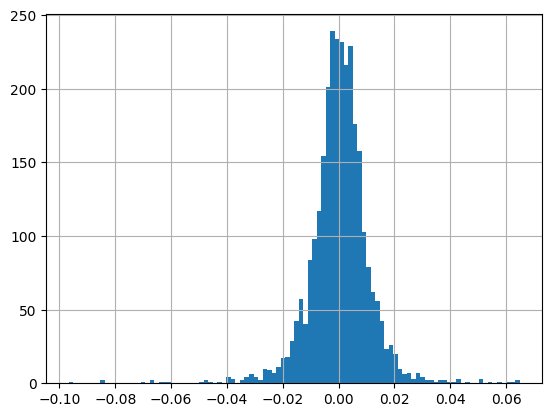

In [19]:
# plotiing histogram of retun of coke
coke["return"].hist(bins = 100)

<Axes: >

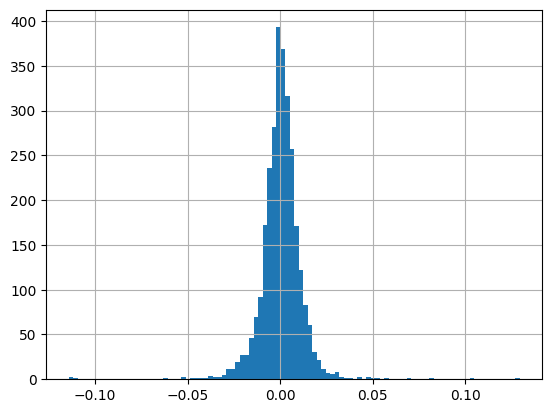

In [20]:
pepsi['return'].hist(bins= 100)

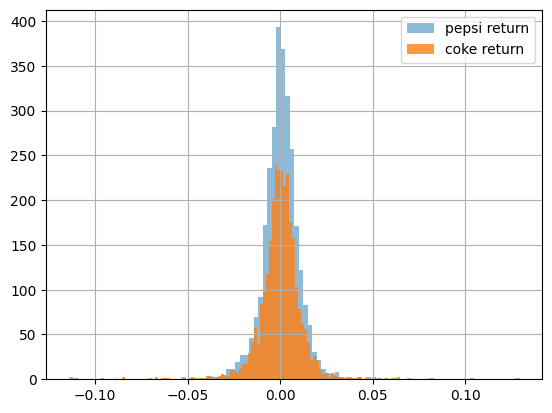

In [21]:
pepsi['return'].hist(bins= 100, label = "pepsi return", alpha = 0.5)
coke["return"].hist(bins = 100, label = "coke return", alpha = 0.8)
plt.legend()

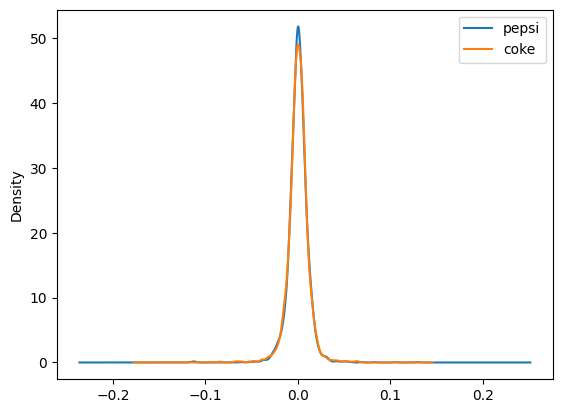

In [22]:
pepsi["return"].plot(kind = "kde",label = "pepsi")
coke["return"].plot(kind = "kde", label = "coke")
plt.legend()

# box plot
- this plot is use for showing the volatility of stocks
- the more the dots away from the mean more the stock volatile

<Axes: >

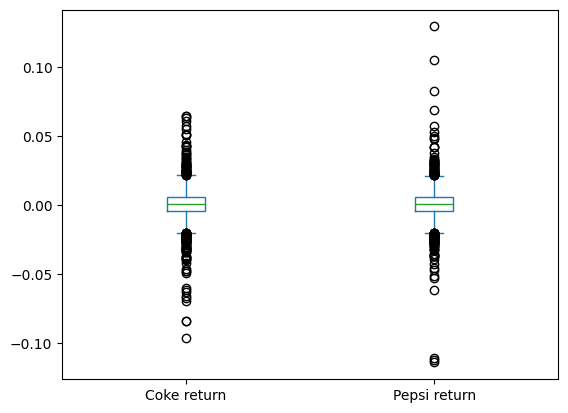

In [23]:
import pandas as pd


# Assuming 'coke' and 'pepsi' are DataFrames containing the 'return' columns

# Concatenate the 'return' columns from 'coke' and 'pepsi'
box_comp = pd.concat([coke['return'], pepsi['return']], axis=1)

# Rename the columns
box_comp.columns = ['Coke return', 'Pepsi return']

# Convert the columns to numeric data types
box_comp['Coke return'] = pd.to_numeric(box_comp['Coke return'], errors='coerce')
box_comp['Pepsi return'] = pd.to_numeric(box_comp['Pepsi return'], errors='coerce')

# Plot the box plot
box_comp.plot(kind='box')


array([[<Axes: xlabel='Coke return', ylabel='Coke return'>,
        <Axes: xlabel='Pepsi return', ylabel='Coke return'>],
       [<Axes: xlabel='Coke return', ylabel='Pepsi return'>,
        <Axes: xlabel='Pepsi return', ylabel='Pepsi return'>]],
      dtype=object)

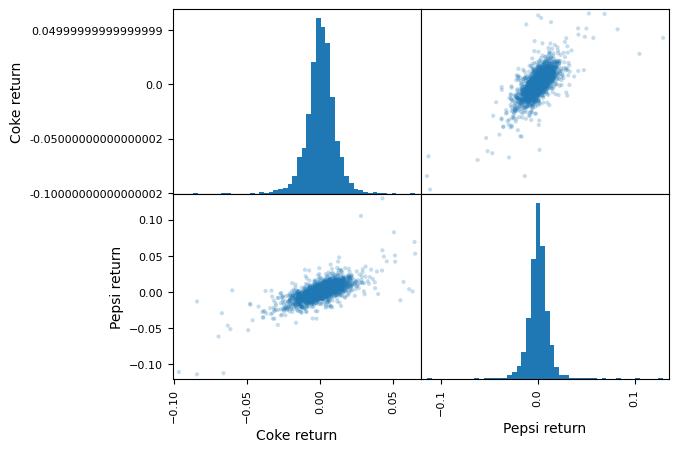

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(box_comp, hist_kwds= {"bins":50}, alpha = 0.25)

# cumulative return
cumulative return shows investor to buy certain investor
to buy or not.
It gives cumulative of returns over a period of time

In [38]:
coke['Cumulative Return'] = (1+coke["return"]).cumprod()
pepsi["Cumulative Return"] = (1+pepsi["return"]).cumprod()

In [39]:
coke.head()

,Open,High,Low,Close,Adj Close,Volume,Traded,MA50,MA100,return,Cumutlative Return,Cumulative Return
Date,,,,,,,,,,,,
2012-01-03,35.075001,35.355000,35.049999,35.070000,24.525681,15639600,5.485590e+08,NaN,NaN,NaN,NaN,NaN
2012-01-04,34.955002,35.035000,34.750000,34.849998,24.371832,14239200,4.977313e+08,NaN,NaN,-0.006273,0.993727,0.993727
2012-01-05,34.880001,34.935001,34.674999,34.685001,24.256435,14287600,4.983515e+08,NaN,NaN,-0.004734,0.989022,0.989022
2012-01-06,34.735001,34.814999,34.310001,34.465000,24.102577,13646600,4.740147e+08,NaN,NaN,-0.006343,0.982749,0.982749
2012-01-09,34.500000,34.584999,34.400002,34.465000,24.102577,10522600,3.630297e+08,NaN,NaN,0.000000,0.982749,0.982749


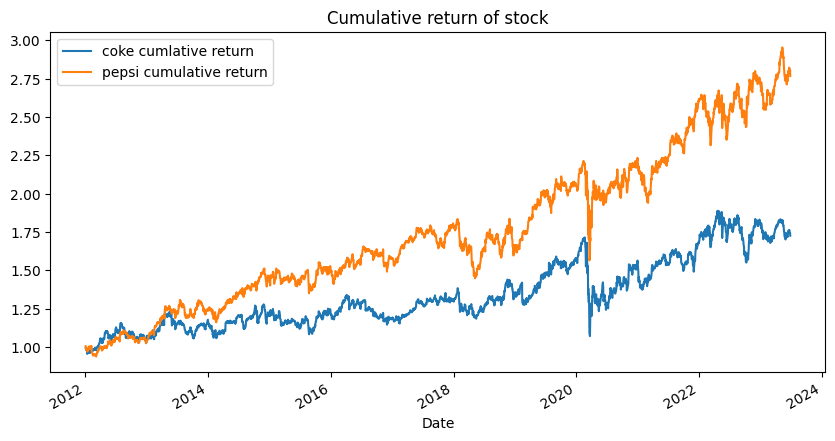

In [41]:
coke['Cumulative Return'].plot(label = "coke cumlative return", figsize = (10,5))
pepsi["Cumulative Return"].plot(label = "pepsi cumulative return")
plt.title("Cumulative return of stock")
plt.legend()